In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [53]:
df=pd.read_csv("mushrooms.csv")
y = df['class']
X = df.drop('class', axis=1)
df=X

In [54]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
for i in df.columns:
    values =array(df[i])
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    values=pd.DataFrame(integer_encoded)
    df=df.drop([i],axis=1)
    df= pd.concat([values, df], axis=1, join='inner')
    df.rename(columns={0:i}, inplace=True)

<BarContainer object of 23 artists>

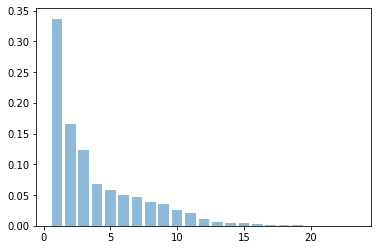

In [55]:
cl=range(1,24)
plt.bar(cl,pca.explained_variance_ratio_,align='center', alpha=0.5)

In [56]:
X_dummy = pd.get_dummies(X, drop_first=True)
X_std = StandardScaler().fit_transform(X_dummy)

Text(0, 0.5, 'Cumulative Explained Variance')

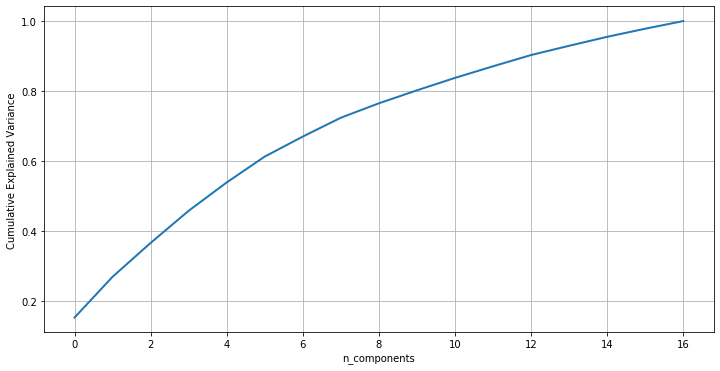

In [70]:
pca = PCA(n_components=17)
X_pca = pca.fit_transform(X_std)
percent_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percent_var_explained)
plt.figure(1, figsize=(12, 6))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')

In [71]:
X_pca = PCA(n_components=2).fit_transform(X_std)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


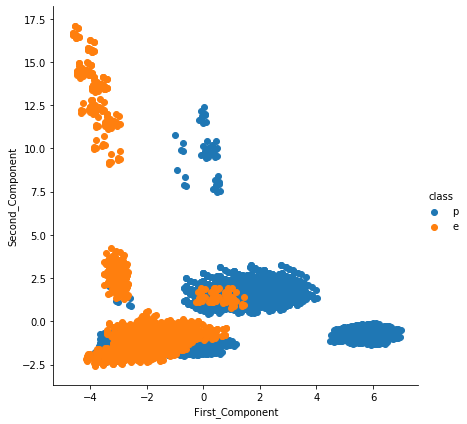

In [72]:
X_pca = np.vstack((X_pca.T, y)).T
df_pca = pd.DataFrame(X_pca, columns=['First_Component',
                                      'Second_Component',
                                      'class'])
sns.FacetGrid(data=df_pca, hue='class', size=6)\
   .map(plt.scatter, 'First_Component', 'Second_Component')\
   .add_legend();